<a href="https://colab.research.google.com/github/gauravjoshigj/Python/blob/main/2857_M2_Demo1_Z_Test_and_T_Test_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 2 - Inferential Statistics

##Demo - Z-test and T-test

In this demo you will see how to perform Z test and T test.

<h1>Student Performance Dataset

The Student Performance Dataset contains student grades and demographic features to analyze factors affecting academic performance.

- <h2>Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

- <h2>Load datasets

In [6]:
math_df = pd.read_csv('student-mat.csv', delimiter=';')
port_df = pd.read_csv('student-por.csv', delimiter=';')

- <h2>Extract final grades

In [7]:
grades_math = math_df['G3']
grades_port = port_df['G3']

- <h2>Merge datasets to find common students

In [8]:
merged_df = pd.merge(math_df, port_df, on=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"], suffixes=("_math", "_port"))

- <h2>Summary statistics

In [9]:
print("Summary Statistics (Math):\n", math_df.describe())
print("Summary Statistics (Portuguese):\n", port_df.describe())
print("\nMissing Values (Math):\n", math_df.isnull().sum())
print("\nMissing Values (Portuguese):\n", port_df.isnull().sum())

Summary Statistics (Math):
               age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   

- <h2>Calculate means and standard deviations

In [10]:
mean_math = np.mean(grades_math)
mean_port = np.mean(grades_port)
std_math = np.std(grades_math, ddof=1)
std_port = np.std(grades_port, ddof=1)
print(f"Math Mean: {mean_math:.2f}")
print(f"Math Standard Deviation: {std_math:.2f}")

Math Mean: 10.42
Math Standard Deviation: 4.58


- <h2>Sample sizes

In [11]:
n_math = len(grades_math)
n_port = len(grades_port)
print(f"Math Sample Size: {n_math}")
print(f"Portuguese Sample Size: {n_port}")

Math Sample Size: 395
Portuguese Sample Size: 649


- <h2>Calculate the population mean

In [12]:
population_mean = (math_df['G3'].sum() + port_df['G3'].sum()) / (n_math + n_port)
print(f"Calculated Population Mean of G3: {population_mean:.2f}")

Calculated Population Mean of G3: 11.34


- <h2>One-Sample Z-Test

One-Sample Z-Test: Z = -4.02, p = 0.0001



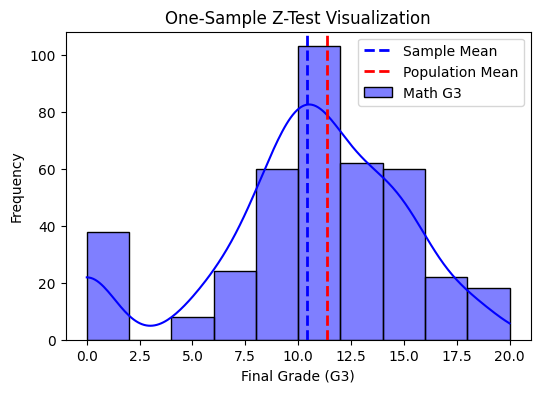

In [ ]:
try:
    z_score = (mean_math - population_mean) / (std_math / np.sqrt(n_math))
    p_value = stats.norm.sf(abs(z_score)) * 2
    print(f"One-Sample Z-Test: Z = {z_score:.2f}, p = {p_value:.4f}\n")

    # Visualization
    plt.figure(figsize=(6, 4))
    sns.histplot(grades_math, bins=10, kde=True, color='blue', label='Math G3')
    plt.axvline(mean_math, color='blue', linestyle='dashed', linewidth=2, label='Sample Mean')
    plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
    plt.xlabel('Final Grade (G3)')
    plt.ylabel('Frequency')
    plt.title('One-Sample Z-Test Visualization')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"Error in One-Sample Z-Test: {e}")

- <h2>Two-Sample Z-Test

In [2]:
try:
    pooled_std = np.sqrt((std_math ** 2 / n_math) + (std_port ** 2 / n_port))
    z_stat = (mean_math - mean_port) / pooled_std
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    print(f"Two-Sample Z-Test: Z = {z_stat:.2f}, p = {p_value:.4f}\n")

    # Visualization
    plt.figure(figsize=(6, 4))
    sns.histplot(grades_math, bins=10, kde=True, color='blue', label='Math G3')
    sns.histplot(grades_port, bins=10, kde=True, color='red', label='Portuguese G3')
    plt.axvline(mean_math, color='blue', linestyle='dashed', linewidth=2, label='Math Mean')
    plt.axvline(mean_port, color='red', linestyle='dashed', linewidth=2, label='Portuguese Mean')
    plt.xlabel('Final Grade (G3)')
    plt.ylabel('Frequency')
    plt.title('Two-Sample Z-Test Visualization')
    plt.legend()
    plt.show()

    alpha = 0.05
    if p_value < alpha:
        print("\n Reject the null hypothesis: There is a significant difference between the two groups.")
    else:
        print("\n Fail to reject the null hypothesis: No significant difference between the two groups.")
except Exception as e:
    print(f"Error in Two-Sample Z-Test: {e}")

Error in Two-Sample Z-Test: name 'np' is not defined


- <h2>One-Sample t-Test

One-Sample t-Test: t = -4.02, p = 0.0001



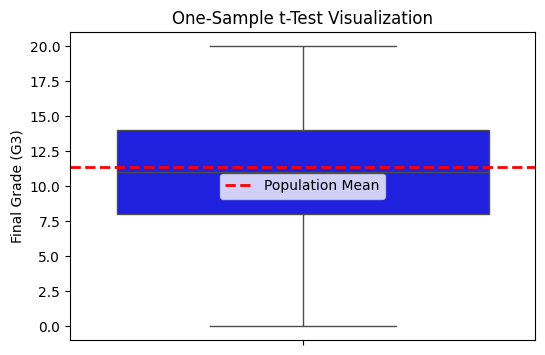

In [ ]:
try:
    t_stat, p_val = stats.ttest_1samp(grades_math, population_mean)
    print(f"One-Sample t-Test: t = {t_stat:.2f}, p = {p_val:.4f}\n")

    # Visualization
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=grades_math, color='blue')
    plt.axhline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
    plt.ylabel('Final Grade (G3)')
    plt.title('One-Sample t-Test Visualization')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"Error in One-Sample t-Test: {e}")

- <h2>Independent T-Test (Male vs Female)

In [1]:
try:
    male_scores = math_df[math_df['sex'] == 'M']['G3']
    female_scores = math_df[math_df['sex'] == 'F']['G3']
    t_stat, p_val = stats.ttest_ind(male_scores, female_scores, equal_var=False)
    print(f"Independent T-Test (Male vs Female): t = {t_stat:.2f}, p = {p_val:.4f}")
except Exception as e:
    print(f"Error in Independent T-Test: {e}")

Error in Independent T-Test: name 'math_df' is not defined


- <h2>Paired T-Test (Math vs Portuguese)

Paired T-Test (Math vs Portuguese): t = -9.98, p = 0.0000



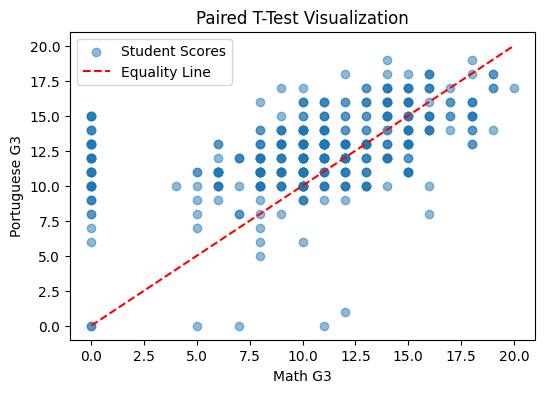

In [ ]:
try:
    t_stat, p_val = stats.ttest_rel(merged_df['G3_math'], merged_df['G3_port'])
    print(f"Paired T-Test (Math vs Portuguese): t = {t_stat:.2f}, p = {p_val:.4f}\n")

    # Visualization
    plt.figure(figsize=(6, 4))
    plt.scatter(merged_df['G3_math'], merged_df['G3_port'], alpha=0.5, label='Student Scores')
    plt.plot([0, 20], [0, 20], linestyle='dashed', color='red', label='Equality Line')
    plt.xlabel('Math G3')
    plt.ylabel('Portuguese G3')
    plt.title('Paired T-Test Visualization')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"Error in Paired T-Test: {e}")